<a href="https://colab.research.google.com/github/Ray3104/Autonomous-vehicle-assignment/blob/main/lab1_Traffic_Sign_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Train a CNN classifier with PyTorch for traffic sign recognition based on "model_cnn", with four convolutional layers plus one fully-connected layer in Section "Some example networks"

In [ ]:
#!rm -rf data

In [ ]:
#get data
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip -P data
!wget https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip -P data


--2021-04-28 20:39:33--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276294756 (263M) [application/zip]
Saving to: ‘data/GTSRB_Final_Training_Images.zip’

GTSRB_Final_Trainin 100%[===================>] 263.50M   107MB/s    in 2.5s    

2021-04-28 20:39:36 (107 MB/s) - ‘data/GTSRB_Final_Training_Images.zip’ saved [276294756/276294756]

--2021-04-28 20:39:36--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88978620 (85M) [application/zip]
Saving to: ‘data/GTSRB_Final_Test_Images.zip’

GTSRB_Final_Test_Im 100%[=============

In [ ]:
#unpackage
! unzip data/GTSRB_Final_Training_Images.zip -d data
! unzip data/GTSRB_Final_Test_Images.zip -d data

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: data/GTSRB/Final_Test/Images/07632.ppm  
  inflating: data/GTSRB/Final_Test/Images/07633.ppm  
  inflating: data/GTSRB/Final_Test/Images/07634.ppm  
  inflating: data/GTSRB/Final_Test/Images/07635.ppm  
  inflating: data/GTSRB/Final_Test/Images/07636.ppm  
  inflating: data/GTSRB/Final_Test/Images/07637.ppm  
  inflating: data/GTSRB/Final_Test/Images/07638.ppm  
  inflating: data/GTSRB/Final_Test/Images/07639.ppm  
  inflating: data/GTSRB/Final_Test/Images/07640.ppm  
  inflating: data/GTSRB/Final_Test/Images/07641.ppm  
  inflating: data/GTSRB/Final_Test/Images/07642.ppm  
  inflating: data/GTSRB/Final_Test/Images/07643.ppm  
  inflating: data/GTSRB/Final_Test/Images/07644.ppm  
  inflating: data/GTSRB/Final_Test/Images/07645.ppm  
  inflating: data/GTSRB/Final_Test/Images/07646.ppm  
  inflating: data/GTSRB/Final_Test/Images/07647.ppm  
  inflating: data/GTSRB/Final_Test/Images/07648.ppm  
  inflating: data/GTSRB/Final_Test/Images/07649.ppm  
 

In [ ]:
! wget https://raw.githubusercontent.com/georgesung/traffic_sign_classification_german/master/signnames.csv -P data

--2021-04-28 20:39:55--  https://raw.githubusercontent.com/georgesung/traffic_sign_classification_german/master/signnames.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 999 [text/plain]
Saving to: ‘data/signnames.csv’

signnames.csv       100%[===================>]     999  --.-KB/s    in 0s      

2021-04-28 20:39:55 (32.9 MB/s) - ‘data/signnames.csv’ saved [999/999]



In [ ]:
!rm -rf /content/data/GTSRB/Final_Test/Images/GT-final_test.test.csv
import os
!wget "https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_GT.zip"
! echo y | unzip GTSRB_Final_Test_GT.zip -d /content/data/GTSRB/Final_Test/Images


--2021-04-28 20:39:55--  https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_GT.zip
Resolving sid.erda.dk (sid.erda.dk)... 130.225.104.13
Connecting to sid.erda.dk (sid.erda.dk)|130.225.104.13|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99620 (97K) [application/zip]
Saving to: ‘GTSRB_Final_Test_GT.zip’

GTSRB_Final_Test_GT 100%[===================>]  97.29K  --.-KB/s    in 0.05s   

2021-04-28 20:39:56 (2.00 MB/s) - ‘GTSRB_Final_Test_GT.zip’ saved [99620/99620]

Archive:  GTSRB_Final_Test_GT.zip
  inflating: /content/data/GTSRB/Final_Test/Images/GT-final_test.csv  


In [ ]:

import pandas

csvfile = pandas.read_csv("/content/data/GTSRB/Final_Test/Images/GT-final_test.csv", header=0)
csvfile = csvfile['Filename;Width;Height;Roi.X1;Roi.Y1;Roi.X2;Roi.Y2;ClassId'].str.split(";",expand=True,)

csvfile = csvfile.rename(columns={0: 'Filename', 1: 'Width', 2: 'Height', 3: 'Roi.X1', 4: 'Roi.Y1' , 5: 'Roi.X2', 6: 'Roi.Y2', 7: 'ClassId'}, index=None)
csvfile.to_csv("/content/data/GTSRB/Final_Test/Images/GT-final_test.csv", index=False)

csvfile = pandas.read_csv("/content/data/GTSRB/Final_Test/Images/GT-final_test.csv", header=0)


In [ ]:
import torch

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, csv_path, images_folder, transform = None):
        self.df = pd.read_csv(csv_path)
        self.images_folder = images_folder
        self.transform = transform

    def __len__(self):
        return len(self.df)
    def __getitem__(self, index):
      
        filename = self.df.iloc[index]["Filename"]
        label = self.df.iloc[index]["ClassId"]
        image = PIL.Image.open(os.path.join(self.images_folder, filename))
        if self.transform is not None:
            image = self.transform(image)
        return image, label

In [ ]:
import pandas as pd
from torch.utils.data import DataLoader

from torchvision import datasets, transforms
from torch.utils.data import Dataset
from skimage import io, transform
from PIL import Image
import PIL

from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

data_transforms = transforms.Compose([        
    transforms.Resize((32,32)),
    transforms.ToTensor(),
    #transforms.Normalize((0.5,), (1.0,))，
    transforms.Grayscale(num_output_channels=1),
    ])


train_data_path = "data/GTSRB/Final_Training/Images"
test_data_path = "data/GTSRB/Final_Test/Images/"

def train_val_dataset(dataset, val_split=0.2):
    train_idx, val_idx = train_test_split(list(range(len(dataset))), test_size=val_split)
    datasets = {}
    datasets['train'] = Subset(dataset, train_idx)
    datasets['val'] = Subset(dataset, val_idx)
    return datasets

labeled_data = datasets.ImageFolder(root = train_data_path,transform = data_transforms)
#test_data = datasets.ImageFolder(root = test_data_path,transform = data_transforms)
test_data = CustomDataset("/content/data/GTSRB/Final_Test/Images/GT-final_test.csv", test_data_path, transform = data_transforms)

datasets = train_val_dataset(labeled_data)

#train_data = datasets['train']
train_data = labeled_data
validation_data = datasets['val']

#Encapsulation
train_loader = DataLoader(train_data, batch_size = 100, shuffle=True)
validation_loader = DataLoader(validation_data, batch_size = 100, shuffle=True)
test_loader = DataLoader(test_data, batch_size = 100, shuffle=False)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


class Flatten(nn.Module):
    def forward(self, x):
        return x.view(x.shape[0], -1)

# 1 input channel for grey scaled image

model_cnn = nn.Sequential(nn.Conv2d(1, 32, 3, padding=1), nn.ReLU(),
                          nn.Conv2d(32, 32, 3, padding=1, stride=2), nn.ReLU(),
                          nn.Conv2d(32, 32, 3, padding=1), nn.ReLU(),
                          nn.Conv2d(32, 32, 3, padding=1, stride=2), nn.ReLU(),
                          nn.Flatten(),
                          nn.Linear(8*8*32, 100), nn.ReLU(),
                          nn.Linear(100, 44)).to(device)


#opt = optim.SGD(model_cnn.parameters(), lr=1e-2)
opt = optim.Adam(model_cnn.parameters(), lr=0.001)


try:
  checkpoint = torch.load("/content/data/model")
  model_cnn.load_state_dict(checkpoint['state_dict'])
  opt.load_state_dict(checkpoint['optimizer'])
  print("loaded model")
except:
  pass


def epoch(loader, model, opt=None):
    total_loss, total_err = 0.,0.
    for X,y in loader:
        X,y = X.to(device), y.to(device)
        yp = model(X)
        loss = nn.CrossEntropyLoss()(yp,y)
        if opt:
            opt.zero_grad()
            loss.backward()
            opt.step()
        
        total_err += (yp.max(dim=1)[1] != y).sum().item()
        total_loss += loss.item() * X.shape[0]
    return total_err / len(loader.dataset), total_loss / len(loader.dataset)


import datetime
for t in range(5):
    train_err, train_loss = epoch(train_loader, model_cnn, opt)
    test_err, test_loss = epoch(test_loader, model_cnn)
    if t == 4:
        for param_group in opt.param_groups:
            param_group["lr"] = 1e-3
    print(*("{:.6f}".format(i) for i in (train_err, train_loss, test_err, test_loss)), sep="\t")
    
    state = {'state_dict': model_cnn.state_dict(), 'optimizer': opt.state_dict()}
    name = '/content/data/model' + str(datetime.datetime.now())
    torch.save(state, name)   
           

0.536050	1.978092	0.202217	0.810771
0.075416	0.281270	0.124782	0.625829
0.034609	0.134131	0.110214	0.629590
0.024255	0.093104	0.119873	0.710236
0.017802	0.064856	0.100000	0.621344


2.1 Untargeted attack using Fast Gradient Sign Method (FGSM), using the function fgsm().

In [ ]:
from torch.utils.data.dataloader import default_collate

def my_collate(batch):
    modified_batch = []
    for item in batch:
        image, label = item
        if label == 14:
            modified_batch.append(item)
    return default_collate(modified_batch)


In [ ]:
def fgsm(model, X, y, epsilon):
    """ Construct FGSM adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    loss = nn.CrossEntropyLoss()(model(X + delta), y)
    loss.backward()
    return epsilon * delta.grad.detach().sign()

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd

test_loader = DataLoader(test_data, batch_size = 1000, shuffle=False, collate_fn=my_collate)
for X,y in test_loader:
  # Send the data and label to the device
  X,y = X.to(device), y.to(device)
  break
    
def plot_images(X,y,yp,M,N):
    f,ax = plt.subplots(M,N, sharex=True, sharey=True, figsize=(N*3,M*1.3*3))
    
    signnames = pd.read_csv('/content/data/signnames.csv')
    #print(signnames.head())
    for i in range(M):
        for j in range(N):
            ax[i][j].imshow(1-X[i*N+j][0].cpu().numpy(), cmap="gray")
            #title = ax[i][j].set_title("Pred: {}".format(yp[i*N+j].max(dim=0)[1]))
            title = ax[i][j].set_title("Pred: {}".format(signnames.iloc[yp[i*N+j].max(dim=0)[1].cpu().numpy()]['SignName']))
            plt.setp(title, color=('g' if yp[i*N+j].max(dim=0)[1] == y[i*N+j] else 'r'))
            ax[i][j].set_axis_off()
    plt.tight_layout()

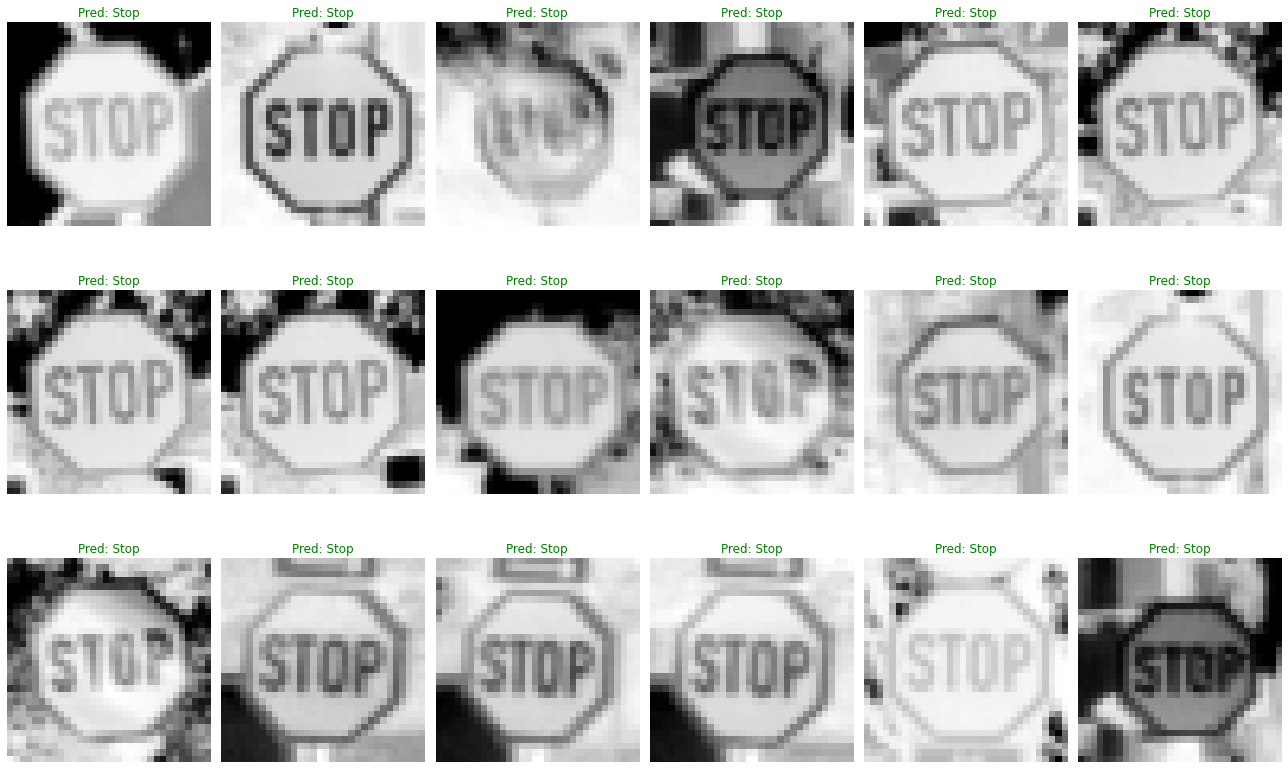

In [ ]:
### Illustrate original predictions
yp = model_cnn(X)
plot_images(X, y, yp, 3, 6)


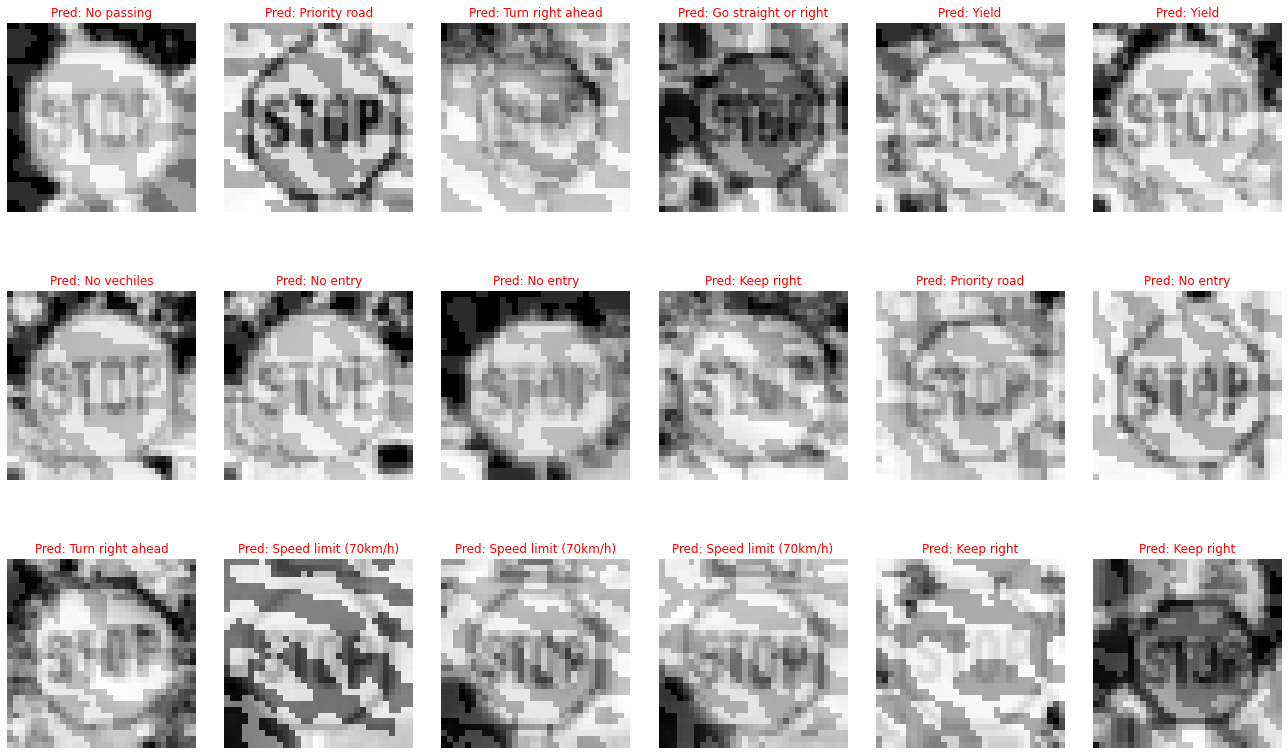

In [ ]:
### Illustrate attacked images
delta = fgsm(model_cnn, X, y, 0.1)
yp = model_cnn(X + delta)
plot_images(X+delta, y, yp, 3, 6)

In [ ]:
def epoch_adversarial(model, loader, attack, *args):
    total_loss, total_err = 0.,0.
    for X,y in loader:
        X,y = X.to(device), y.to(device)
        delta = attack(model, X, y, *args)
        yp = model(X+delta)
        loss = nn.CrossEntropyLoss()(yp,y)
        
        total_err += (yp.max(dim=1)[1] != y).sum().item()
        total_loss += loss.item() * X.shape[0]
    return total_err / len(loader.dataset), total_loss / len(loader.dataset)

In [ ]:
test_loader = DataLoader(test_data, batch_size = 1000, shuffle=False, collate_fn=my_collate)
print("        CNN:", epoch_adversarial(model_cnn, test_loader, fgsm, 0.1)[0])

        CNN: 0.02098178939034046


2.2 Untargeted attack using Projected Gradient Descent, using the function pgd_linf() (use the Projected Steepest Descent variant to accelerate the process).

In [ ]:
def pgd(model, X, y, epsilon, alpha, num_iter):
    """ Construct FGSM adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    for t in range(num_iter):
        loss = nn.CrossEntropyLoss()(model(X + delta), y)
        loss.backward()
        delta.data = (delta + X.shape[0]*alpha*delta.grad.data).clamp(-epsilon,epsilon)
        delta.grad.zero_()
    return delta.detach()

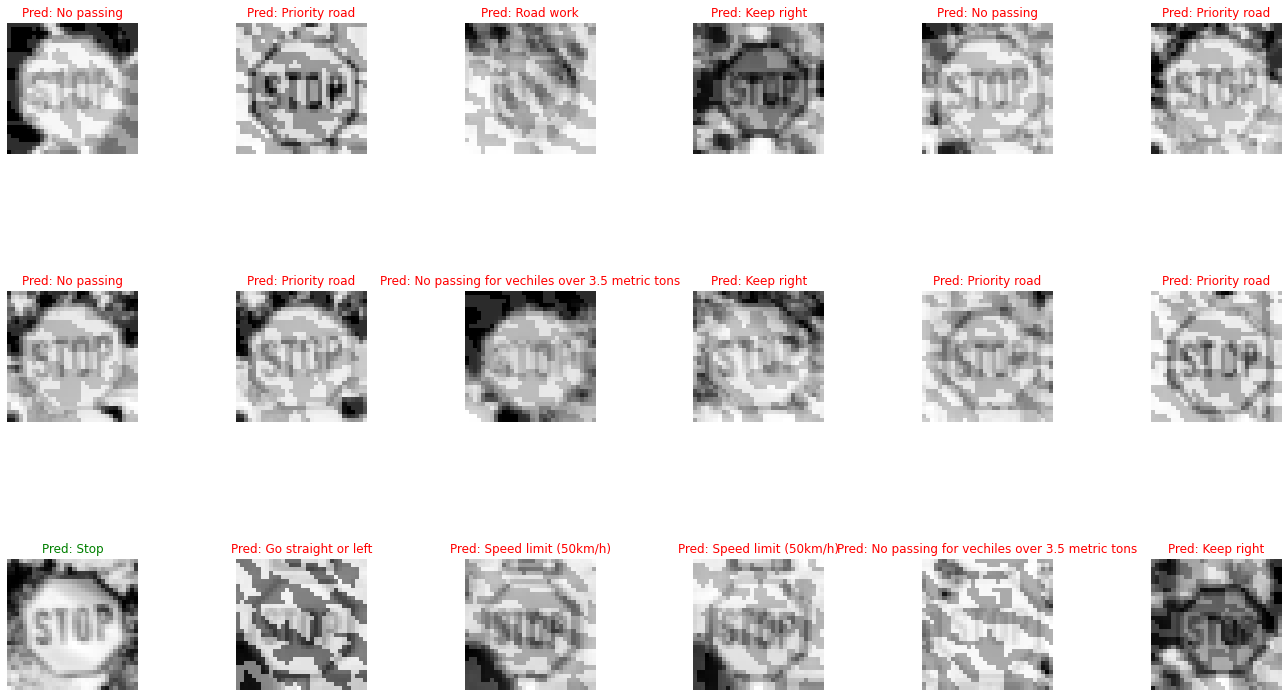

In [ ]:
### Illustrate attacked images
delta = pgd(model_cnn, X, y, 0.1, 1e4, 1000)
yp = model_cnn(X + delta)
plot_images(X+delta, y, yp, 3, 6)

In [ ]:
delta = torch.zeros_like(X, requires_grad=True)
loss = nn.CrossEntropyLoss()(model_cnn(X + delta), y)
loss.backward()
print(delta.grad.abs().mean().item())

0.00010315177496522665


2.3 Targeted attack using Projected Gradient Descent, using the function pgd_linf_targ(), which aims to maximize logit of the target class y_targ and minimize logit of the true class y. (Speed limit signs)

In [ ]:
def my_collate2(batch):
    modified_batch2 = []
    for item in batch:
        image, label = item
        if label == 4:
            modified_batch2.append(item)
    return default_collate(modified_batch2)

In [ ]:
def pgd_linf_targ(model, X, y, epsilon, alpha, num_iter, y_targ):
    """ Construct targeted adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    for t in range(num_iter):
        yp = model(X + delta)
        loss = (yp[:,y_targ] - yp.gather(1,y[:,None])[:,0]).sum()
        loss.backward()
        delta.data = (delta + alpha*delta.grad.detach().sign()).clamp(-epsilon,epsilon)
        delta.grad.zero_()
    return delta.detach()

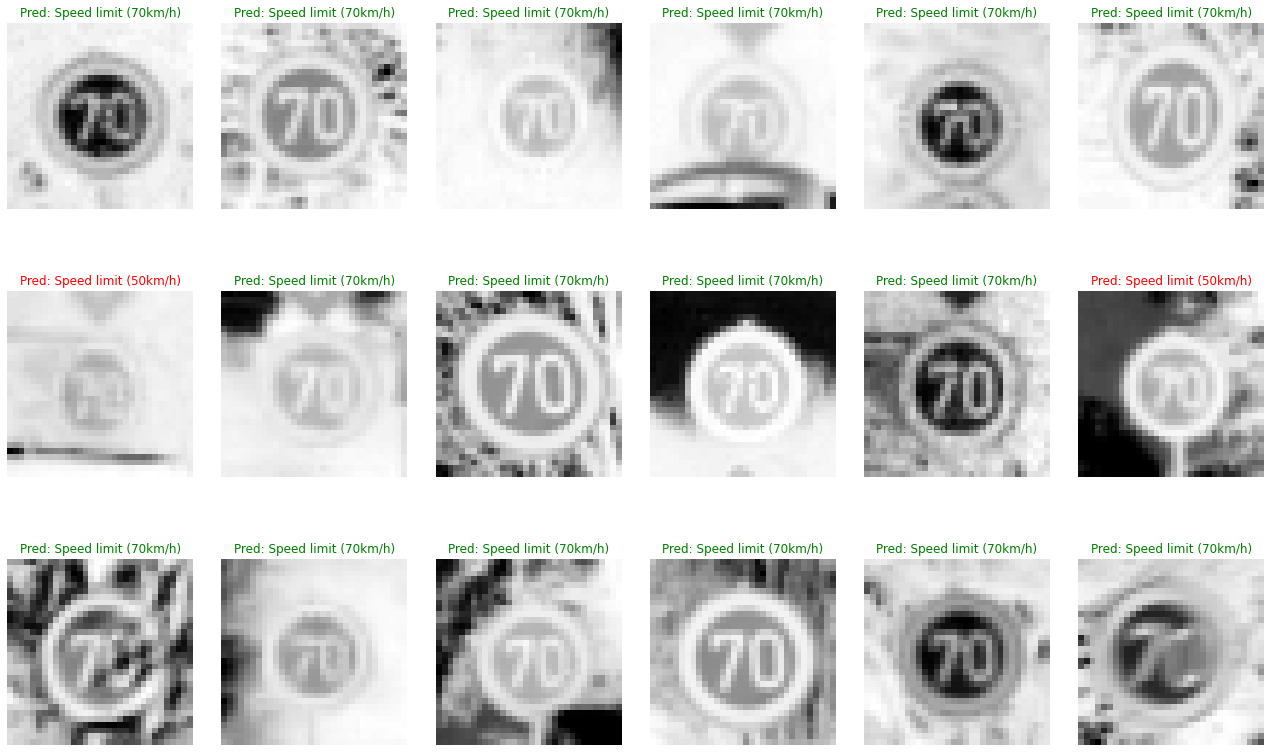

In [ ]:
test_loader = DataLoader(test_data, batch_size = 1000, shuffle=False, collate_fn=my_collate2)
for X,y in test_loader:
    X,y = X.to(device), y.to(device)
yp = model_cnn(X)
plot_images(X, y, yp, 3, 6)

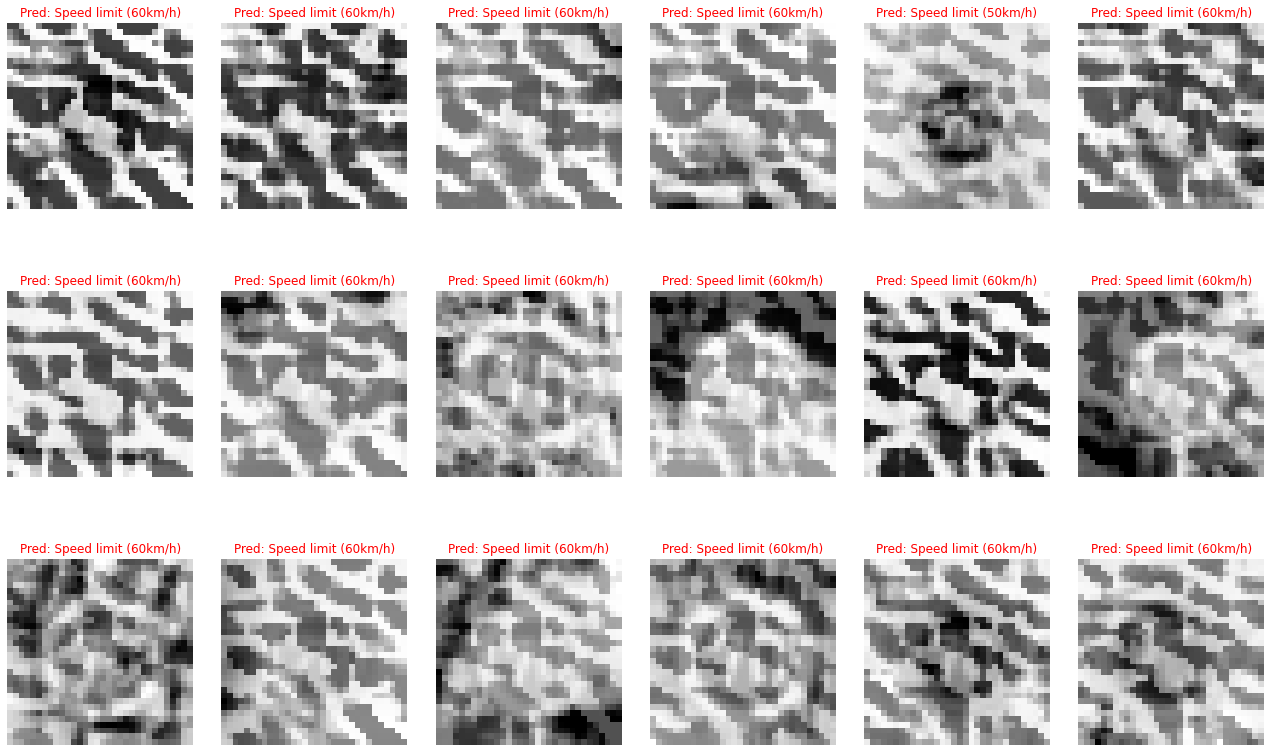

In [ ]:
test_loader = DataLoader(test_data, batch_size = 1000, shuffle=False, collate_fn=my_collate2)
for X,y in test_loader:
    X,y = X.to(device), y.to(device)
    delta = pgd_linf_targ(model_cnn, X, y, epsilon=0.2, alpha=1e-2, num_iter=40, y_targ=2)
yp = model_cnn(X + delta)
plot_images(X+delta, y, yp, 3, 6)

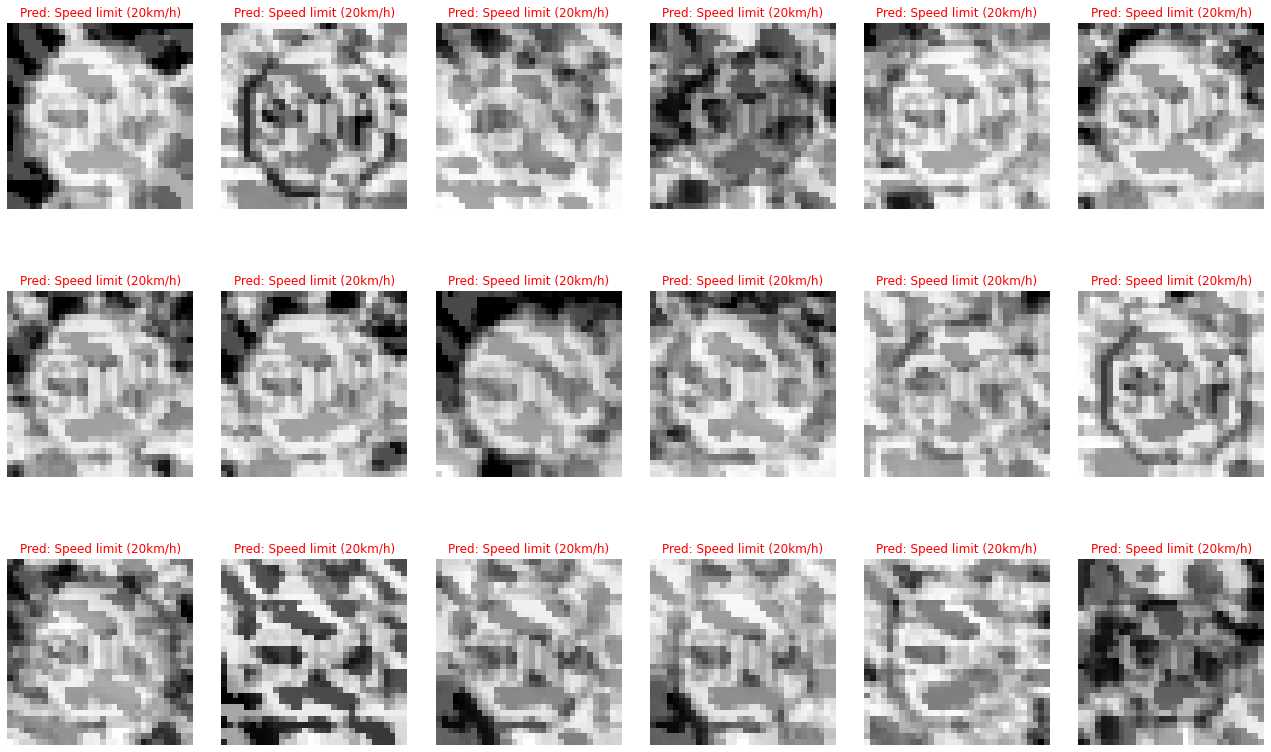

In [ ]:
delta = pgd_linf_targ(model_cnn, X, y, epsilon=0.2, alpha=1e-2, num_iter=40, y_targ=0)
yp = model_cnn(X + delta)
plot_images(X+delta, y, yp, 3, 6)


Targeted attack using Projected Gradient Descent, using the function pgd_linf_targ2(),  which  aims to maximize logit of the target class y_targ and minimize logit of all the other classes y'.

In [ ]:
def pgd_linf_targ2(model, X, y, epsilon, alpha, num_iter, y_targ):
    """ Construct targeted adversarial examples on the examples X"""
    delta = torch.zeros_like(X, requires_grad=True)
    for t in range(num_iter):
        yp = model(X + delta)
        loss = 2*yp[:,y_targ].sum() - yp.sum()
        loss.backward()
        delta.data = (delta + alpha*delta.grad.detach().sign()).clamp(-epsilon,epsilon)
        delta.grad.zero_()
    return delta.detach()

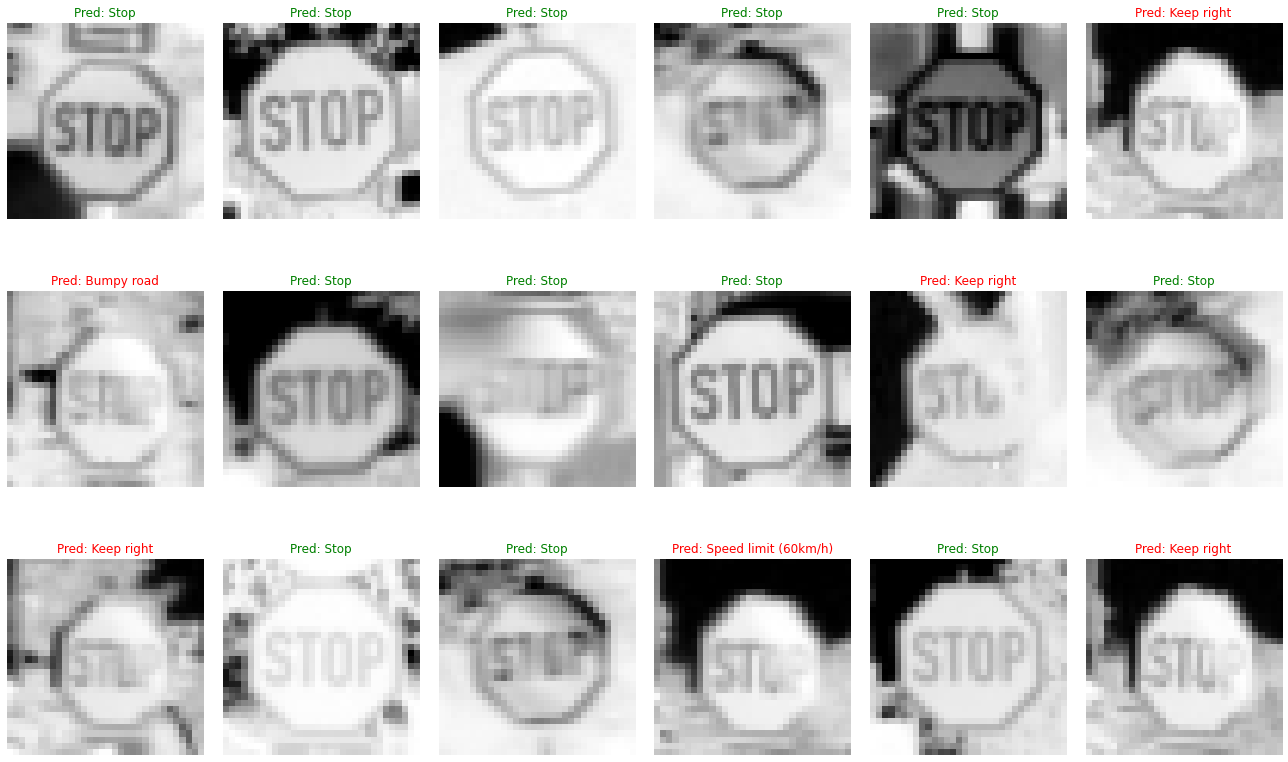

In [ ]:
test_loader = DataLoader(test_data, batch_size = 5000, shuffle=False, collate_fn=my_collate)
for X,y in test_loader:
    X,y = X.to(device), y.to(device)
yp = model_cnn(X)
plot_images(X, y, yp, 3, 6)

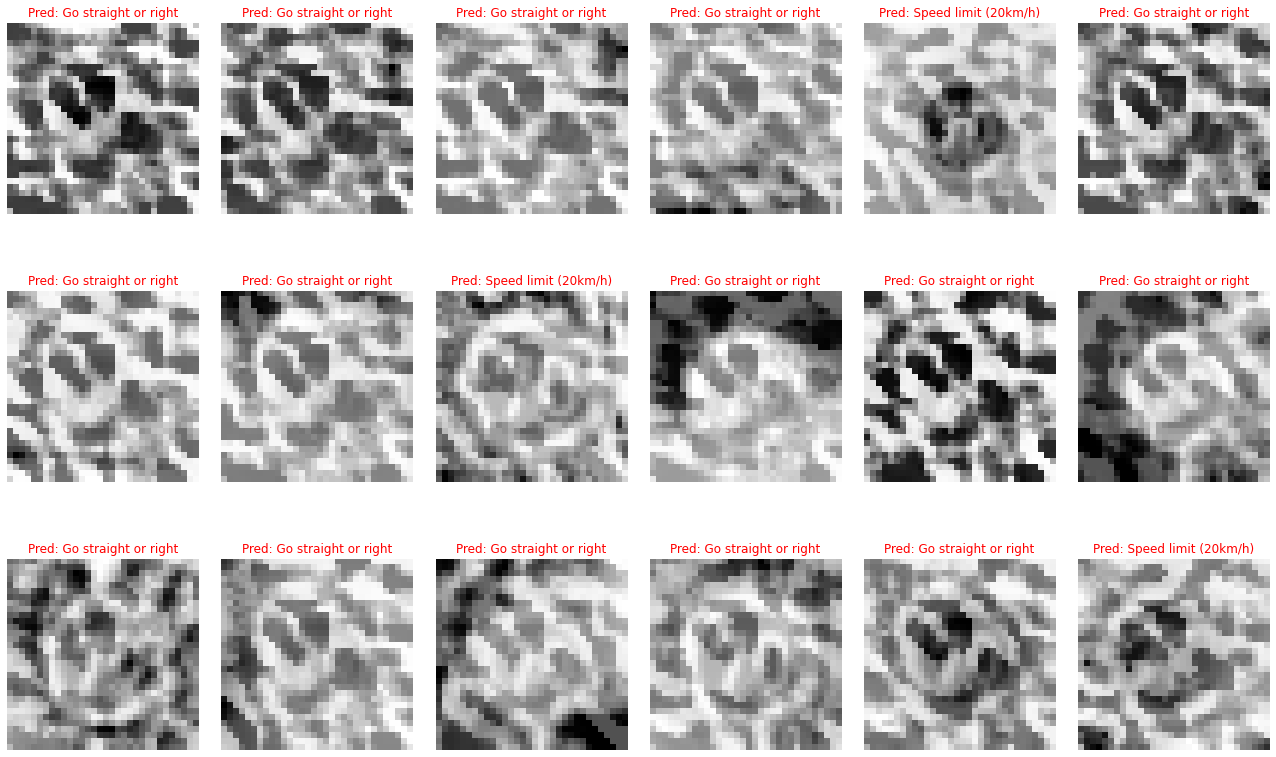

In [ ]:
test_loader = DataLoader(test_data, batch_size = 1000, shuffle=False, collate_fn=my_collate)
for X,y in test_loader:
    X,y = X.to(device), y.to(device)
    delta = pgd_linf_targ(model_cnn, X, y, epsilon=0.2, alpha=1e-2, num_iter=40, y_targ=0)
yp = model_cnn(X + delta)
plot_images(X+delta, y, yp, 3, 6)

# **Conclusion**

I followed the code shared by Kalle at first, but the format of Final test set doesn't satisfy the 'ImageFolder' function, this command defaults that the data set has been divided into different folders according to the type to be allocated, and only pictures are stored under one type of folder
the data format should be 'root/dog/xxx.png'. Then I build a custom dataset to fix this problem.
And I used GT-final test class name file, but the strings can only be read in a continuos line, then I splited them as labels.

About the accurate, after building a custom dataset, I split the dataset into test, train and validation sets, and tried to use the Adam as an optimmizer instead of SGD algorithm, the accuracy would be better after 10 epochs but for reducing the running time, I just trained it for 5 times and got test error about 0.10 (not that good but enough for performing the attack).

According to the attacking results, the differences are not obvious between different attack methods, which migh because of the gray scaling.